# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv("../data/dayofweek.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numTrials         1686 non-null   float64
 1   hour              1686 non-null   float64
 2   dayofweek         1686 non-null   int64  
 3   uid_user_0        1686 non-null   float64
 4   uid_user_1        1686 non-null   float64
 5   uid_user_10       1686 non-null   float64
 6   uid_user_11       1686 non-null   float64
 7   uid_user_12       1686 non-null   float64
 8   uid_user_13       1686 non-null   float64
 9   uid_user_14       1686 non-null   float64
 10  uid_user_15       1686 non-null   float64
 11  uid_user_16       1686 non-null   float64
 12  uid_user_17       1686 non-null   float64
 13  uid_user_18       1686 non-null   float64
 14  uid_user_19       1686 non-null   float64
 15  uid_user_2        1686 non-null   float64
 16  uid_user_20       1686 non-null   float64


,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
target = df["dayofweek"]
features = df.drop(columns=["dayofweek"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=21)
y_test.value_counts() / y_train.value_counts()

0    0.295238
1    0.234234
2    0.192000
3    0.265176
4    0.300000
5    0.254630
6    0.240418
Name: dayofweek, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=21, stratify=target)
y_test.value_counts() / y_train.value_counts()

3    0.253165
6    0.249123
1    0.251142
5    0.248848
2    0.252101
0    0.247706
4    0.253012
Name: dayofweek, dtype: float64

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [6]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.6272189349112426

### b. SVM

In [7]:
model = svm.SVC(random_state=21, probability=True, kernel="linear")
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.7159763313609467

### c. Decision tree

In [8]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.5295857988165681

### d. Random forest

In [9]:
model = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367

Answer: Random forest

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [10]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')

In [11]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [12]:
scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)
print("mean", scores.mean())
print("std", scores.std())

mean 0.45291983657368284
std 0.16960708432126997


### b. SVM

In [13]:
model = svm.SVC(random_state=21, probability=True, kernel="linear")
scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)
print("mean", scores.mean())
print("std", scores.std())

mean 0.5051986475063398
std 0.15857963555262297


### c. Decision tree

In [14]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)
print("mean", scores.mean())
print("std", scores.std())

mean 0.3883523527754297
std 0.11835394295385691


### d. Random forest

In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)
print("mean", scores.mean())
print("std", scores.std())

mean 0.6607847280924204
std 0.17462799234675505


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [16]:
best = 0
for i in (1, 5, 10, 25, 50, 75, 100):
    for j in (1, 10, 50, 100, 150, 200, 250):
        model = RandomForestClassifier(n_estimators=j, max_depth = i, random_state=21)
        scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)
        print("n_estimators: ", i, " max_depth: ", j, "score: ", scores.mean())
        if scores.mean() > best:
            best=scores.mean()
print("best:", best)

n_estimators:  1  max_depth:  1 score:  0.22895886165116935
n_estimators:  1  max_depth:  10 score:  0.3622464074387151
n_estimators:  1  max_depth:  50 score:  0.36403212172442945
n_estimators:  1  max_depth:  100 score:  0.37291842772612005
n_estimators:  1  max_depth:  150 score:  0.364634404057481
n_estimators:  1  max_depth:  200 score:  0.36877993801070724
n_estimators:  1  max_depth:  250 score:  0.3711468019160327
n_estimators:  5  max_depth:  1 score:  0.3090025359256129
n_estimators:  5  max_depth:  10 score:  0.48742955762186535
n_estimators:  5  max_depth:  50 score:  0.47318610876303185
n_estimators:  5  max_depth:  100 score:  0.47498943364327983
n_estimators:  5  max_depth:  150 score:  0.47318963088193866
n_estimators:  5  max_depth:  200 score:  0.4731966751197521
n_estimators:  5  max_depth:  250 score:  0.4726049591434208
n_estimators:  10  max_depth:  1 score:  0.45555085939701334
n_estimators:  10  max_depth:  10 score:  0.550503663003663
n_estimators:  10  max_dep

In [17]:
model = RandomForestClassifier(n_estimators=50, max_depth = 50, random_state=21)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367

In [18]:
def draws_barh(coefs, features, n, b=True):
    if b==True:
        cf = abs(coefs).sum(axis=0)
    else:
        cf = abs(coefs)
    fig, ax = plt.subplots(figsize=(15, 8))
    indices = cf.argsort()[::-1][:n]
    ax.barh(np.arange(n), cf[indices], color="g")
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

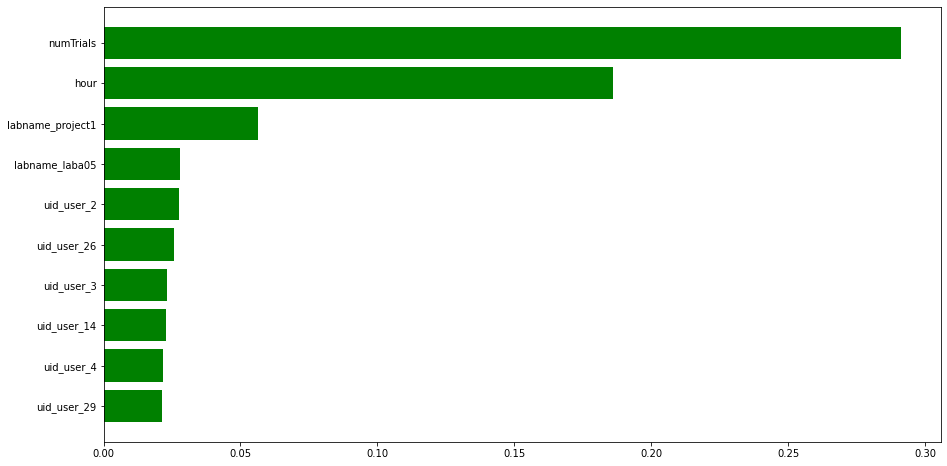

In [19]:
draws_barh(model.feature_importances_, features.columns, 10, False)

In [20]:
joblib.dump(model, "../data/rand_forest.joblib")

['../data/rand_forest.joblib']

In [21]:
model_2 = joblib.load("../data/rand_forest.joblib")

In [22]:
predict = model_2.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367